## **Importing Libraries**


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

## **Importing Dataset**


In [3]:
df = pd.read_csv("OCR_Digits.csv")
df.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P56,P57,P58,P59,P60,P61,P62,P63,P64,Target
0,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
1,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
2,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
3,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6
4,0,0,11,16,10,1,0,0,0,4,...,3,0,0,10,16,16,16,16,6,2


## **Data Analytics**

In [16]:
df.shape


(5100, 65)

In [17]:
df.isnull().sum()

P1        0
P2        0
P3        0
P4        0
P5        0
         ..
P61       0
P62       0
P63       0
P64       0
Target    0
Length: 65, dtype: int64

<Axes: xlabel='Target', ylabel='count'>

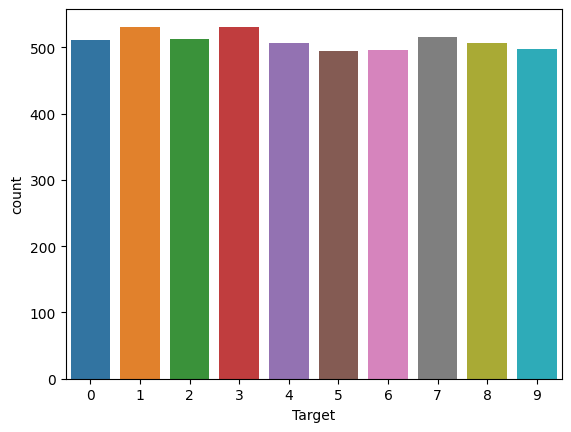

In [19]:
sns.countplot(x = 'Target', data = df)

In [4]:
X = df.iloc[:,0:-1]
y = df['Target']

In [7]:
ss = StandardScaler()
ss.fit_transform(X)

array([[ 0.        , -0.34234031,  0.98754793, ..., -0.65273876,
        -0.52288277, -0.17044551],
       [ 0.        , -0.34234031,  0.55476645, ..., -1.17291706,
        -0.52288277, -0.17044551],
       [ 0.        , -0.34234031, -1.17635946, ..., -0.82613153,
        -0.52288277, -0.17044551],
       ...,
       [ 0.        , -0.34234031,  0.77115719, ..., -1.17291706,
        -0.52288277, -0.17044551],
       [ 0.        , -0.34234031, -1.17635946, ...,  1.08118888,
        -0.52288277, -0.17044551],
       [ 0.        , -0.34234031,  0.55476645, ..., -0.479346  ,
        -0.52288277, -0.17044551]])

## **Creating 10 Samples**

In [8]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [9]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

## **Fitness Function**

In [10]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

## **Calculating best accuracy of each sample**

In [11]:
best_acc_list = list()
best_of_all = 0
for i in range(len(samples)):
  acc_list = list()
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    acc_list.append(score)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  if best_accuracy > best_of_all:
    best_of_all = best_accuracy
    best_acc_list = acc_list.copy()
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]
     

Best Accuracy =  0.99 Best Kernel =  poly Best Nu =  0.49 Best Epsilon =  5.51
Best Accuracy =  0.99 Best Kernel =  poly Best Nu =  6.7 Best Epsilon =  1.67
Best Accuracy =  0.99 Best Kernel =  poly Best Nu =  1.49 Best Epsilon =  2.96
Best Accuracy =  0.99 Best Kernel =  poly Best Nu =  5.63 Best Epsilon =  6.48
Best Accuracy =  0.99 Best Kernel =  poly Best Nu =  4.65 Best Epsilon =  1.4
Best Accuracy =  0.99 Best Kernel =  poly Best Nu =  9.05 Best Epsilon =  0.21
Best Accuracy =  0.99 Best Kernel =  poly Best Nu =  1.73 Best Epsilon =  4.91
Best Accuracy =  1.0 Best Kernel =  poly Best Nu =  1.38 Best Epsilon =  4.84
Best Accuracy =  0.99 Best Kernel =  poly Best Nu =  4.8 Best Epsilon =  8.98
Best Accuracy =  0.99 Best Kernel =  poly Best Nu =  5.52 Best Epsilon =  1.08


## **Result Table**

In [12]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.99,poly,0.49,5.51
1,2,0.99,poly,6.70,1.67
2,3,0.99,poly,1.49,2.96
3,4,0.99,poly,5.63,6.48
4,5,0.99,poly,4.65,1.40
5,6,0.99,poly,9.05,0.21
6,7,0.99,poly,1.73,4.91
7,8,1.00,poly,1.38,4.84
8,9,0.99,poly,4.80,8.98
9,10,0.99,poly,5.52,1.08


## **Plotting of the Convergence Graph**

In [13]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [14]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)   

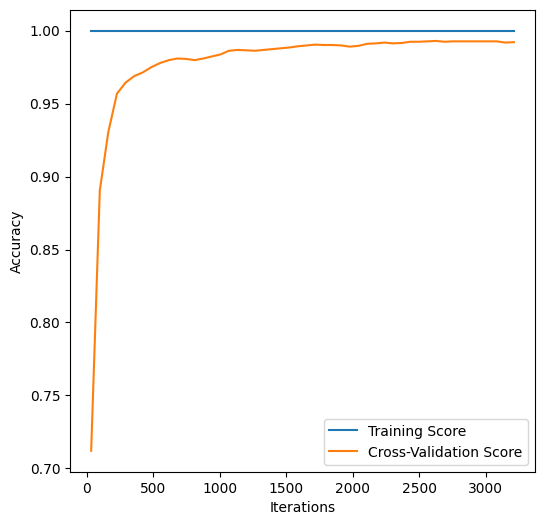

In [15]:
plt.figure(figsize=(6, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.show()